# Ford GoBike System data

In this project Ford GoBike System data, we take dataset one and two months on 2018 and We'll use graphs. First step, we merge one and two months dataset and take advantage of the Existing data. Second step, the univariant exploration.
Third step, bivariate exploration. Fourth step, multivariate exploration. Last step, we'll put three questions and answer it.


In [1]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests
import random
%matplotlib inline

## Read Data

In [2]:
# Merge two files into one file
file_names = sorted(glob("2018*-fordgobike-tripdata.csv"))
file_names

['201801-fordgobike-tripdata.csv', '201802-fordgobike-tripdata.csv']

In [3]:
# Add a column to show this row for any month
df_dataset = pd.concat((pd.read_csv(file).assign(filename = file)
           for file in file_names), ignore_index = True)
df_dataset.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,filename
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,201801-fordgobike-tripdata.csv
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,201801-fordgobike-tripdata.csv
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,201801-fordgobike-tripdata.csv
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,201801-fordgobike-tripdata.csv
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,201801-fordgobike-tripdata.csv
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236,Market St at 8th St,37.803686,-122.282497,160,West Oakland BART Station,37.805318,-122.294837,1306,Customer,No,201801-fordgobike-tripdata.csv
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,No,201801-fordgobike-tripdata.csv
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,No,201801-fordgobike-tripdata.csv
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,Yes,201801-fordgobike-tripdata.csv
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,Yes,201801-fordgobike-tripdata.csv


In [4]:
df_dataset.shape

(201520, 15)

In [5]:
df_dataset.nunique()

duration_sec                 6367
start_time                 201510
end_time                   201513
start_station_id              277
start_station_name            277
start_station_latitude        277
start_station_longitude       277
end_station_id                277
end_station_name              277
end_station_latitude          277
end_station_longitude         277
bike_id                      3197
user_type                       2
bike_share_for_all_trip         2
filename                        2
dtype: int64

In [6]:
df_dataset.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,201520.000000,201520.000000,201520.000000,201520.000000,201520.000000,201520.000000,201520.000000,201520.000000
mean,875.027342,108.011051,37.769970,-122.356518,105.510674,37.770162,-122.355667,2032.332300
std,2612.322670,91.114093,0.095251,0.114071,90.554062,0.095079,0.113376,1092.235558
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,11.000000
25%,357.000000,30.000000,37.771058,-122.411738,28.000000,37.771662,-122.411306,1115.000000
50%,555.000000,81.000000,37.781383,-122.398525,79.000000,37.781752,-122.397405,2129.000000
75%,858.000000,171.000000,37.795392,-122.388098,167.000000,37.795393,-122.388098,3001.000000
max,86366.000000,342.000000,37.880222,-121.874119,342.000000,37.880222,-121.874119,3747.000000


In [7]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201520 entries, 0 to 201519
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             201520 non-null  int64  
 1   start_time               201520 non-null  object 
 2   end_time                 201520 non-null  object 
 3   start_station_id         201520 non-null  int64  
 4   start_station_name       201520 non-null  object 
 5   start_station_latitude   201520 non-null  float64
 6   start_station_longitude  201520 non-null  float64
 7   end_station_id           201520 non-null  int64  
 8   end_station_name         201520 non-null  object 
 9   end_station_latitude     201520 non-null  float64
 10  end_station_longitude    201520 non-null  float64
 11  bike_id                  201520 non-null  int64  
 12  user_type                201520 non-null  object 
 13  bike_share_for_all_trip  201520 non-null  object 
 14  file

## Univariant Exploration

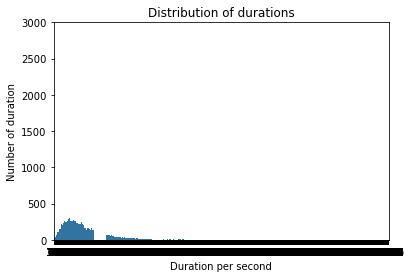

In [8]:
# Column bar graph 'duration_sec'
base_color = sb.color_palette()[0]
cat_order = df_dataset['duration_sec'].value_counts()
plt.axis([0, 3000, 0, 3000])
sb.countplot(data = df_dataset, x = 'duration_sec', color = base_color)
plt.title('Distribution of durations')
plt.xlabel('Duration per second')
plt.ylabel('Number of duration')
plt.show()


In this diagram the data is not clear due to the large amount of data

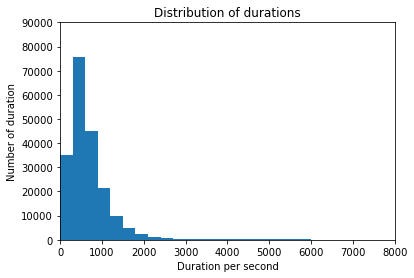

In [10]:
# Column bar graph 'duration_sec'
binsize = 300
bins = np.arange(0, df_dataset['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_dataset, x = 'duration_sec', bins = bins)
plt.title('Distribution of durations')
plt.xlabel('Duration per second')
plt.ylabel('Number of duration')
plt.axis([0, 8000, 0, 90000])
plt.show()

The distribution of the flight times over the distance per second and it became clear that the distribution of the journey times from zero to a thousand at the highest value and then begins to decrease.

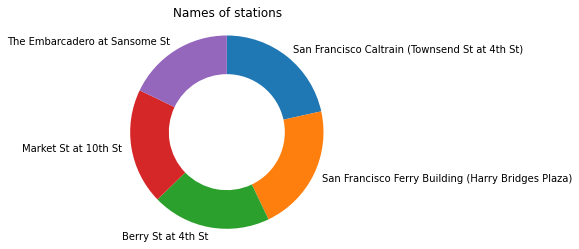

In [11]:

# Column bar graph 'start_station_name'
sorted_counts = df_dataset['start_station_name'].value_counts()[:5]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')
plt.title('Names of stations')
plt.show()

These are the 5 best stations that repeat their name, so these stations should be taken care and interest in the weakest stations.

### Summary:

In the first graph, in this diagram the data is not clear due to the large amount of data and in the second graph the distribution of the flight times over the distance per second and it became clear that the distribution of the journey times from zero to a thousand at the highest value and then begins to decrease. Last graph these are the 5 best stations that repeat their name, so these stations should be taken care and interest in the weakest stations.

## Bivariate Exploration

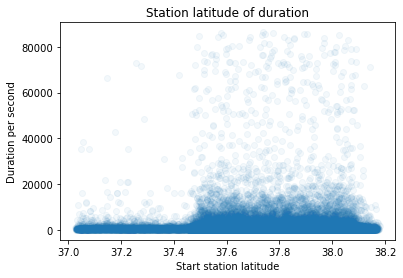

In [12]:
# Columns bar graph 'duration_sec' and 'start_station_latitude'
sb.regplot(data = df_dataset, x = 'start_station_latitude', y = 'duration_sec', x_jitter = 0.3, 
            scatter_kws = {'alpha' : 1/20})
plt.title('Station latitude of duration')
plt.xlabel('Start station latitude')
plt.ylabel('Duration per second')
plt.show()

It does not affect the duration on latitude.

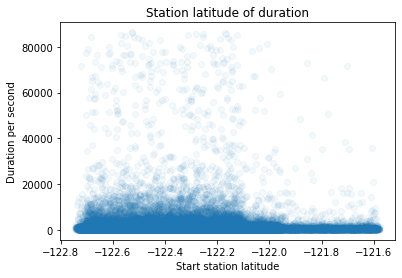

In [13]:
# Columns bar graph 'duration_sec' and 'start_station_longitude'
sb.regplot(data = df_dataset, x = 'start_station_longitude', y = 'duration_sec', x_jitter = 0.3, 
            scatter_kws = {'alpha' : 1/20});
plt.title('Station latitude of duration')
plt.xlabel('Start station latitude')
plt.ylabel('Duration per second')
plt.show()

There is no clear pattern between the two variables.

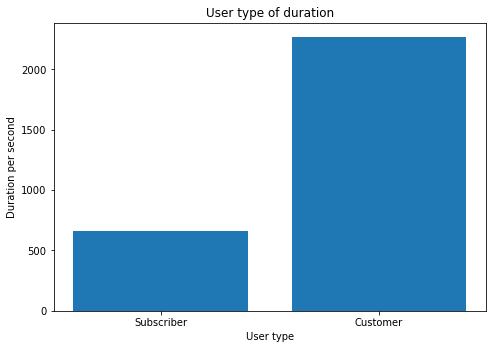

In [14]:
# Columns bar graph 'duration_sec' and 'user_type'
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bars = df_dataset['user_type'].value_counts().index
avg_duration = [df_dataset[(df_dataset['user_type']=='Subscriber')]['duration_sec'].mean(),df_dataset[(df_dataset['user_type']=='Customer')]['duration_sec'].mean()]
ax.bar(bars,avg_duration)
plt.title('User type of duration')
plt.xlabel('User type')
plt.ylabel('Duration per second')
plt.show()

Unsubscribed customers are three times the number of subscribers and this is a large number. We need non-subscribed customers to subscribe and provide them with offers and benefit from this number of non-subscribers. So, we opinion that if not giving them offers will benefit other competitors in the future.

### Summary:
In the first graph, it does not affect the duration on latitude and in the second graph there is no clear pattern between the two variables. Last graph unsubscribed customers are three times the number of subscribers and this is a large number. We need non-subscribed customers to subscribe and provide them with offers and benefit from this number of non-subscribers. So, we opinion that if not giving them offers will benefit other competitors in the future.

## Multivariate Exploration

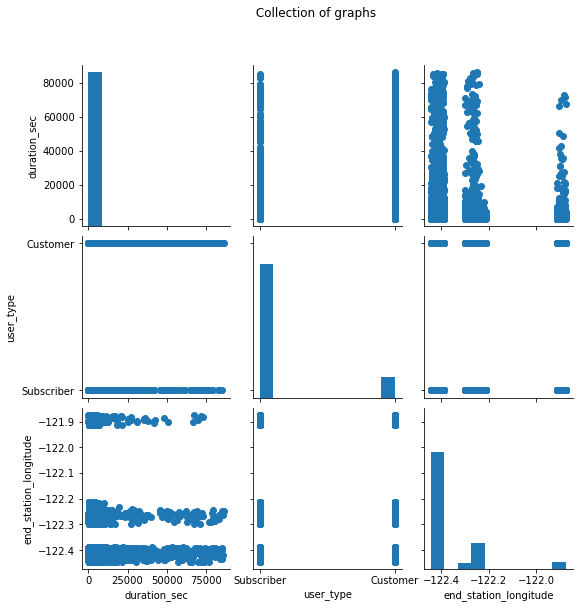

In [23]:
# Columns bar graphs 'duration_sec' , 'user_type' and 'end_station_longitude'
g = sb.PairGrid(data = df_dataset, vars = ['duration_sec', 'user_type', 'end_station_longitude'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.suptitle(' Collection of graphs',y = 1.1)
plt.show()

These graphs are not clear and need more analysis and depth.

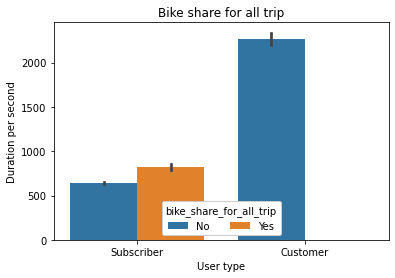

In [16]:
# Columns bar graph 'duration_sec' , 'user_type' and 'bike_share_for_all_trip'
ax_user = sb.barplot(data = df_dataset, y = 'duration_sec', x = 'user_type', hue = 'bike_share_for_all_trip')
ax_user.legend(loc = 8, ncol = 3, framealpha = 1, title = 'bike_share_for_all_trip')
plt.title('Bike share for all trip')
plt.xlabel('User type')
plt.ylabel('Duration per second')
plt.show()

It became clear to us that trips are only limited to subscribers, so opinion to open trips to non-subscribers to ensure a greater number.

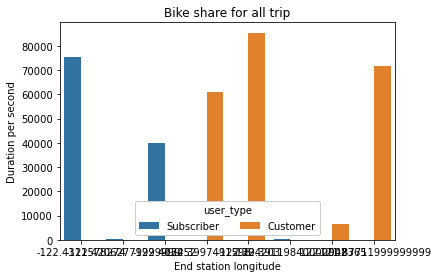

In [17]:
# Columns bar graph 'duration_sec' , 'end_station_longitude' and 'user_type'
ax_dur = sb.barplot(data = df_dataset[:8], y = 'duration_sec', x = 'end_station_longitude', hue = 'user_type')
ax_dur.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')
plt.title('Bike share for all trip')
plt.xlabel('End station longitude')
plt.ylabel('Duration per second')
plt.show()

The volume of data is large, the vision is not clear and it needs more analysis.


### Summary:
In the first graph, these graphs are not clear and need more analysis and depth and in the second graph it became clear to us that trips are only limited to subscribers, so opinion to open trips to non-subscribers to ensure a greater number. Last graph the volume of data is big, the vision is not clear and it needs more analysis.

# Questions

Q1: For start_station, what is the most common one? 

In [18]:
#ans q1

df_dataset['start_station_name'].value_counts()[:5]

San Francisco Caltrain (Townsend St at 4th St)        4624
San Francisco Ferry Building (Harry Bridges Plaza)    4584
Berry St at 4th St                                    4255
Market St at 10th St                                  4159
The Embarcadero at Sansome St                         3837
Name: start_station_name, dtype: int64

San Francisco Caltrain (Townsend St at 4th St) appears to be the most common station to start from. Hence, managers might consider impproving the service there and increasing the number of employees. 

Q2: How many did not share their bikes?

In [19]:
#ans Q2

len(df_dataset[df_dataset['bike_share_for_all_trip']=='No'])

185916

Q3: What is the percent of those who did not share teir bikes?

In [20]:
#ans q3

len(df_dataset[df_dataset['bike_share_for_all_trip']=='No'])/len(df_dataset)*100

92.2568479555379

Clearly, most of the customers did not share their bike. Therefore, managers should not bother with this service any more.

### Summary:

Univariant Exploration:

In the first graph, in this diagram the data is not clear due to the large amount of data and in the second graph the distribution of the flight times over the distance per second and it became clear that the distribution of the journey times from zero to a thousand at the highest value and then begins to decrease. Last graph these are the 5 best stations that repeat their name, so these stations should be taken care and interest in the weakest stations.

Bivariate Exploration:

In the first graph, it does not affect the duration on latitude and in the second graph there is no clear pattern between the two variables. Last graph unsubscribed customers are three times the number of subscribers and this is a large number. We need non-subscribed customers to subscribe and provide them with offers and benefit from this number of non-subscribers. So, we opinion that if not giving them offers will benefit other competitors in the future.

Multivariate Exploration:

In the first graph, these graphs are not clear and need more analysis and depth and in the second graph it became clear to us that trips are only limited to subscribers, so opinion to open trips to non-subscribers to ensure a greater number. Last graph the volume of data is big, the vision is not clear and it needs more analysis.

In [4]:
! jupyter nbconvert bike_sharing_data.ipynb --to slides --template output-toggle.tpl

[NbConvertApp] Converting notebook bike_sharing_data.ipynb to slides
[NbConvertApp] Writing 357064 bytes to bike_sharing_data.slides.html
